<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

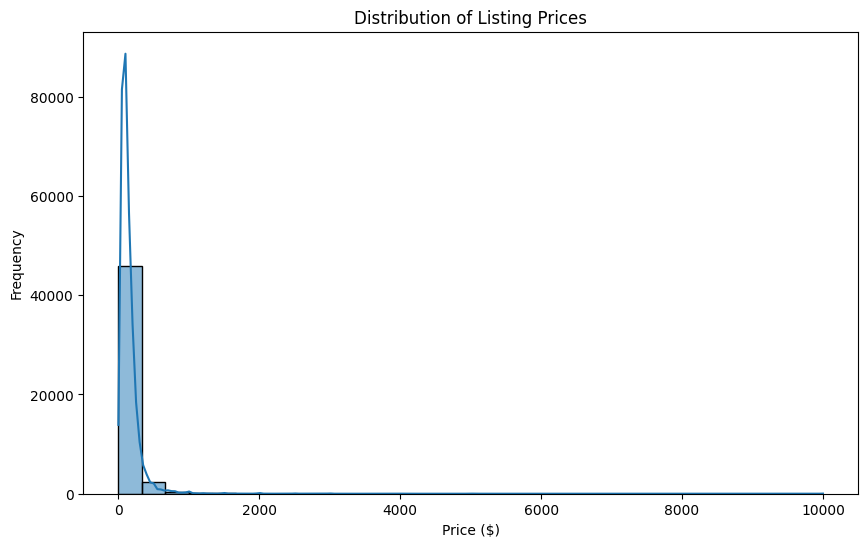

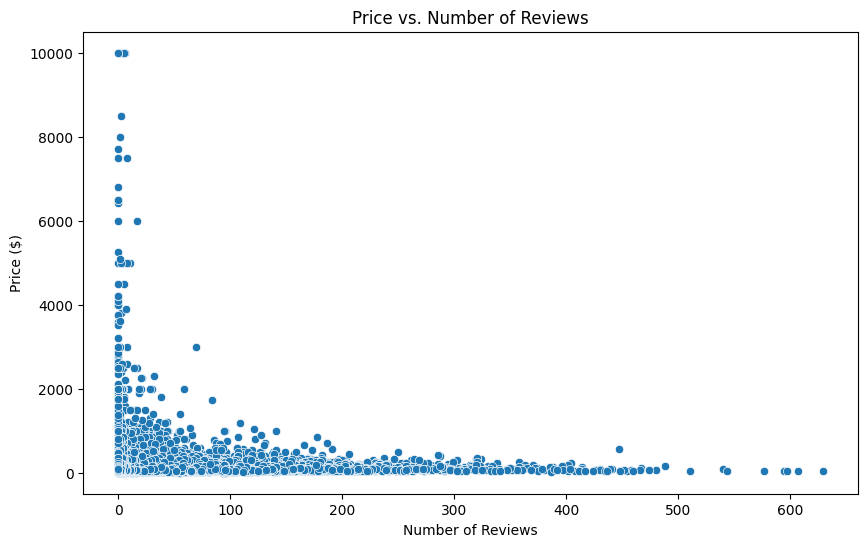

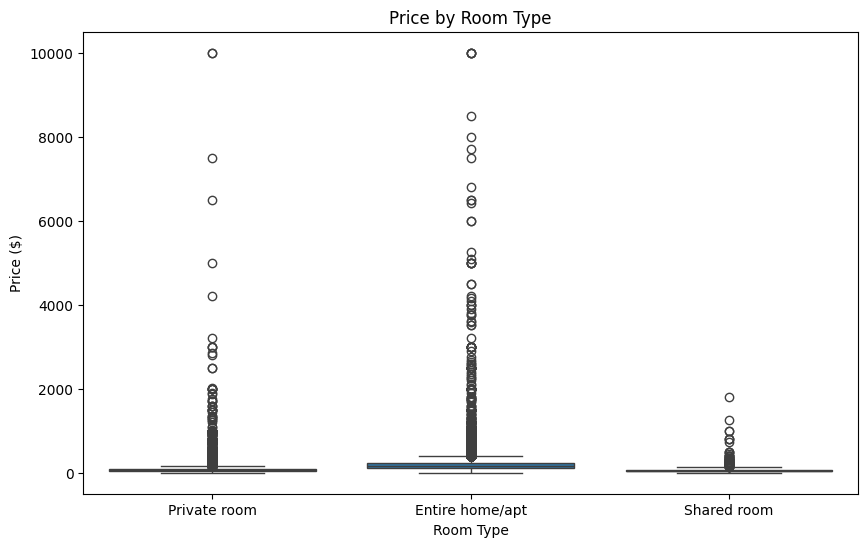

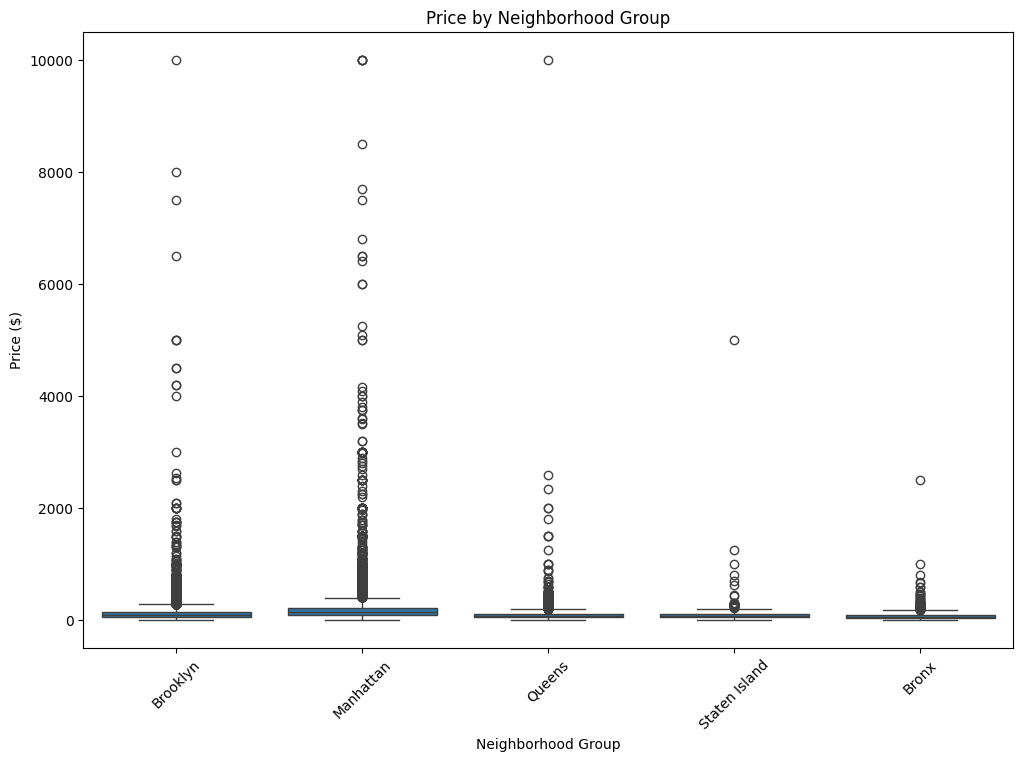

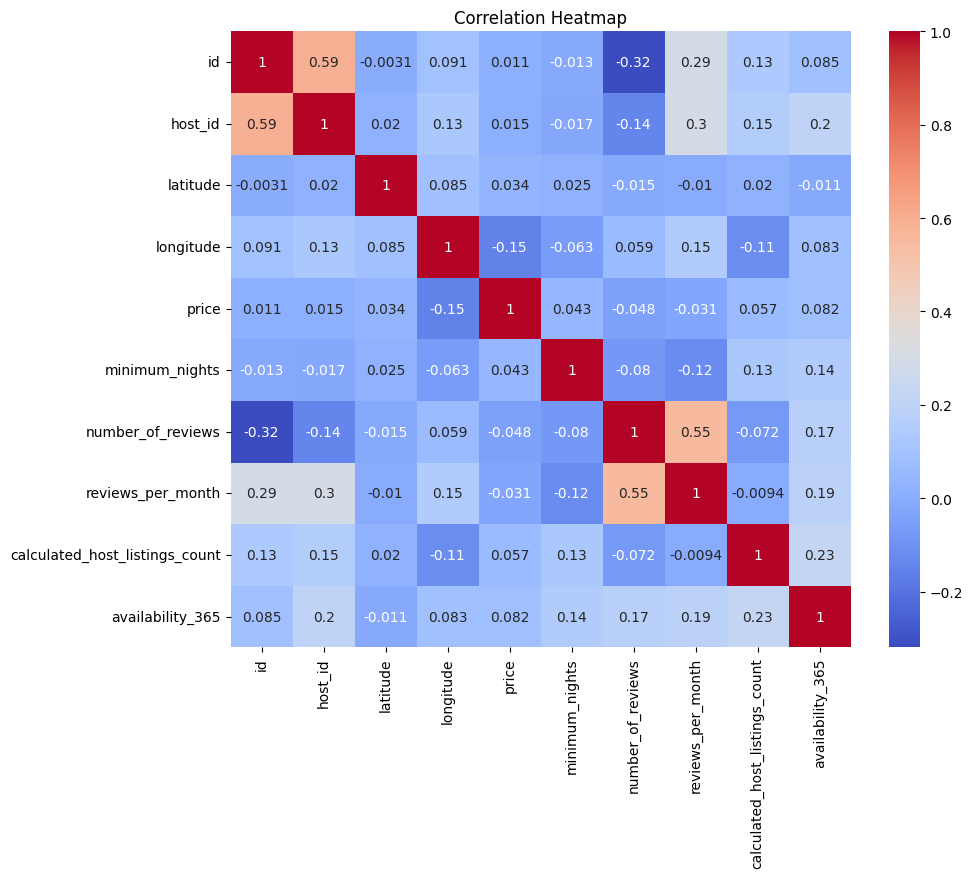

Mean Absolute Error: 70.22284525880133
Mean Squared Error: 39353.32858797547
R-squared Score: 0.11042278255304583
                              Feature  Coefficient
0                            latitude  -264.977273
1                           longitude  -450.498077
2                      minimum_nights     0.150566
3                   number_of_reviews    -0.202481
4           neighbourhood_group_Bronx    39.810182
5        neighbourhood_group_Brooklyn   -11.768286
6       neighbourhood_group_Manhattan    57.465746
7          neighbourhood_group_Queens    22.992015
8   neighbourhood_group_Staten Island  -108.499657
9           room_type_Entire home/apt    78.869397
10             room_type_Private room   -25.414459
11              room_type_Shared room   -53.454938
Cross-validation Scores: [0.05544821 0.07654019 0.08655147 0.11156807 0.09516855]
Mean Cross-validation Score: 0.08505529956094823

Model Interpretation:
- The model coefficients represent the change in price for a one-unit

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("C:\\Users\\surve\\OneDrive\\Desktop\\internship\\project\\New folder\\AB_NYC_2019.csv")

# Display the first few rows of the dataset
data.head()

# Basic data exploration
data.info()

# Check for missing values
data.isnull().sum()

# Data cleaning and preprocessing (This will vary based on the dataset and specific goals of the analysis)

# Exploratory Data Analysis (EDA)
# Distribution of listing prices
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='price', bins=30, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of price vs. number of reviews
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='number_of_reviews', y='price')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.show()

# Box plot of price by room type
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='room_type', y='price')
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

# Box plot of price by neighborhood group
plt.figure(figsize=(12,8))
sns.boxplot(data=data, x='neighbourhood_group', y='price')
plt.title('Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

# Correlation analysis
# Selecting numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,8))
corr = data[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering (Create new features if needed)

# Model Building (Predict listing prices)
# Selecting relevant features and target variable
features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'neighbourhood_group', 'room_type']
X = data[features]
y = data['price']

# One-hot encoding categorical features
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r_squared)

# Model interpretation
# Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())

# Conclusion
print("\nModel Interpretation:")
print("- The model coefficients represent the change in price for a one-unit change in each feature.")
print("- For example, for every one-unit increase in latitude, the price is expected to increase by the latitude coefficient.")
print("- Similarly, for categorical variables like room type, the coefficients represent the difference in price compared to the reference category.")

print("\nConclusion:")
print("- We have analyzed the Airbnb listings in New York City.")
print("- We observed the distribution of listing prices and explored various factors influencing prices, such as number of reviews, room type, and neighborhood group.")
print("- We built a simple linear regression model to predict listing prices based on selected features.")
print("- The model achieved a Mean Absolute Error of", mae, ", a Mean Squared Error of", mse, ", and an R-squared score of", r_squared, "on the test set.")
print("- The cross-validation scores suggest that the model generalizes well to unseen data, with a mean cross-validation score of", cv_scores.mean(), ".")
